In [92]:
using DataFrames

include("src/spectrum.jl")
include("src/modesolutions.jl")
include("src/shgintegration.jl")
include("src/shg.jl")
include("src/basic.jl")

query (generic function with 1 method)

## 配置参数范围，扫描给定波长范围的基频模式

In [108]:
lambda_f = [1500, 1600] # 扫谱波长范围 nm
mode = "TE" # 电磁场模式
R = 2.6 # WGM 半径
n = 3.3 # 折射率

d22 = 2.1
d31 = -4.3
d33 = -27
d14 = 170
# d = [[0, 0, 0, 0, d31, -d22], [-d22, d22, 0, d31, 0, 0], [d31, d31, d33, 0, 0, 0]] # 非线性张量
d = [[0, 0, 0, d14, 0, 0], [0, 0, 0, 0, d14, 0], [0, 0, 0, 0, 0, d14]]

n_num_max = 1 # 扫描最大径向阶数

# 扫谱
data_f = spectrum(lambda_f, mode, n_num_max, n, R, Q_factor="open", option="n_num depend");

### 基频模式存入文件

In [94]:
# 扫谱结果存入文件
path_f = "/Users/wenzhengliu/Research/temp_data/radius=$R refractive_id=$n wavelength=$lambda_f'nm' n_max=$n_num_max mode=$mode.csv"
CSV.write(path_f, data_f)

"/Users/wenzhengliu/Research/temp_data/radius=2.6 refractive_id=3.3 wavelength=[1500, 1600]'nm' n_max=1 mode=TE.csv"

## 配置参数范围，扫描给定波长范围的倍频模式

In [95]:
lambda_shg = lambda_f/2 # 倍频光扫谱波长范围 nm
data_shg = spectrum(lambda_shg, mode, n_num_max, n, R, Q_factor="open", option="n_num depend");

Finished ✓      100%|███████████████████████████████████| Time: 0:00:02


### 倍频模式存入文件

In [96]:
# 扫谱结果存入文件
path_shg = "/Users/wenzhengliu/Research/temp_data/radius=$R refractive_id=$n wavelength=$lambda_shg'nm' n_max=$n_num_max mode=$mode.csv"
CSV.write(path_shg, data_shg)

"/Users/wenzhengliu/Research/temp_data/radius=2.6 refractive_id=3.3 wavelength=[750.0, 800.0]'nm' n_max=1 mode=TE.csv"

## 光谱图

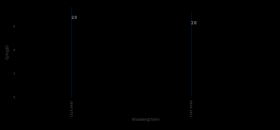

In [68]:
# 显示谱线结果
view_spectrum(lambda_f, data_f, 1, view_mode="details")

## 选定某一模式，绘制场分布图

In [206]:
# 作图，给定模式数
n_num, l_num, m_num = 1, 29, 29
# println(query(n_num, l_num, option=data_shg))

(1, 199, 199)

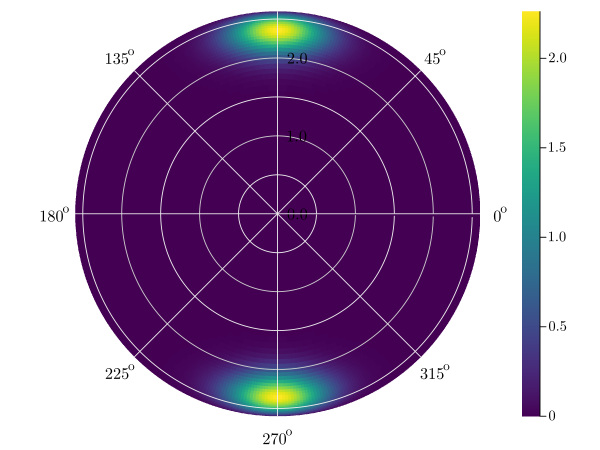

In [117]:
n_num, l_num, m_num = 1, 29, 29
view_field(data_f, n_num, l_num, m_num, n, R, mode, "nE_theta", quality="coarse", scale="normal")

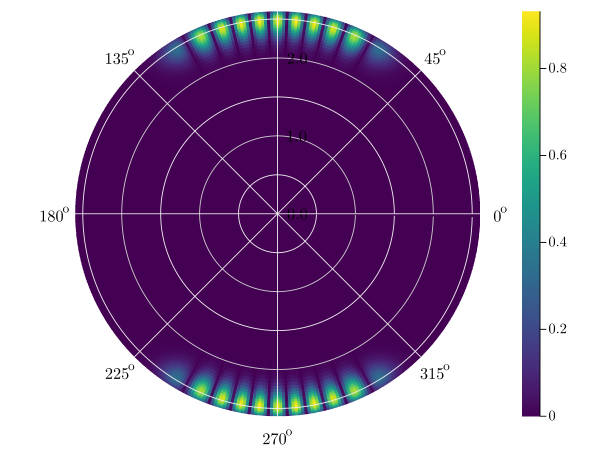

In [118]:
n_num, l_num, m_num = 1, 64, 55

view_field(data_shg, n_num, l_num, m_num, n, R, mode, "nE_phi", quality="coarse", scale="normal")

In [105]:
#=
lambda = [1580, 1600] # 扫谱波长范围 nm
lambda_shg = lambda/2

mode = "TE" # 电磁场模式
R = 25 # WGM 半径
n = 1.5 # 折射率
n_num_max = 2 # 径向阶数
=#
path_f1 = "/Users/wenzhengliu/Research/temp_data/radius=$R refractive_id=$n wavelength=$lambda_f'nm' n_max=$n_num_max mode=TE.csv"
path_f2 = "/Users/wenzhengliu/Research/temp_data/radius=$R refractive_id=$n wavelength=$lambda_f'nm' n_max=$n_num_max mode=TM.csv"
data_f1 = CSV.File(path_f1)
data_f2 = CSV.File(path_f2)
data_f = sort!(vcat(DataFrame(data_f1),DataFrame(data_f2)), :wavelength);

path_shg1 = "/Users/wenzhengliu/Research/temp_data/radius=$R refractive_id=$n wavelength=$lambda_shg'nm' n_max=$n_num_max mode=TE.csv"
path_shg2 = "/Users/wenzhengliu/Research/temp_data/radius=$R refractive_id=$n wavelength=$lambda_shg'nm' n_max=$n_num_max mode=TM.csv"
data_shg1 = CSV.File(path_shg1)
data_shg2 = CSV.File(path_shg2)
data_shg = sort!(vcat(DataFrame(data_shg1),DataFrame(data_shg2)), :wavelength);

In [122]:
detune = detuning(data_f, data_shg)
show(detune, allcols=true)

32×11 DataFrame
 Row │ ratio_g      n_f    l_f    mode_f  wavelength_f  Q_f      n_shg  l_shg  mode_shg  wavelength_shg  Q_shg   
     │ Float64      Int64  Int64  String  Float64       Float64  Int64  Int64  String    Float64         Float64 
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ 1.64317e-9       1     29  TE           1565.06  7.16931      1     61  TM               781.57   7.30364
   2 │ 1.0704e-9        1     30  TE           1518.25  7.62019      1     63  TM               758.733  7.77156
   3 │ 6.09174e-10      1     29  TE           1565.06  7.16931      1     62  TE               780.951  7.30282
   4 │ 2.75301e-10      1     28  TM           1567.84  7.17336      1     61  TM               781.57   7.30364
   5 │ 1.75274e-10      1     30  TE           1518.25  7.62019      1     64  TE               758.152  7.76976
   6 │ 1.73036e-10      1     28  TM           1567.84  7.17336      1     62

In [11]:
n_num1 = 1
l_num1 = 199
m_num1 = 198
lambda1 = query(n_num1, l_num1, option=data_f)
mode1 = "TE"
field_type1 = "E"

n_num2 = 2 
l_num2 = 395
m_num2 = 395
lambda2 = query(n_num2, l_num2, option=data_shg)
mode2 = "TE"
field_type2 = "E"

#=
field_parameters = [[lambda1, l_num1, m_num1, mode1, field_type1], [lambda1, l_num1, m_num1, mode1, field_type1]]
overlap_field(field_parameters, n, R, digit=3)

integral_region(lambda1,l_num1, m_num1, n, R, mode1, "E"; error=1e-2)

field_parameters_nonlinearity = [[lambda1, l_num1, m_num1, mode1], [lambda2, l_num2, m_num2, mode2]]
g, contribution = overlap_nonlinearity(field_parameters_nonlinearity, n, R, d; digit=1)
println(contribution)
=#


"E"

In [120]:
d = d_rotation(d, 0, pi/4, 0)

3-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 2.86535148113274e-14, 0.0, 170.0]
 [170.0, 0.0, -170.0, 0.0, 1.0409497792752502e-14, 0.0]
 [0.0, 0.0, 0.0, -170.0, 0.0, 2.3162572253464855e-14]

In [121]:
g = overlap_array(detune, n, R, d, [20, 30], 32) # 单位 Hz
show(g, allcols=true)

Finished ✓      100%[==================================================] Time: 3:27:13


2956×15 DataFrame
  Row │ g             g_total                     ratio_g      n_f    l_f    m_f    mode_f  wavelength_f  Q_f      n_shg  l_shg  m_shg  mode_shg  wavelength_shg  Q_shg   
      │ Float64       Complex…                    Float64      Int64  Int64  Int64  String  Float64       Float64  Int64  Int64  Int64  String    Float64         Float64 
──────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    1 │    4.19856e7  -4.30999e-22+5.23681e-5im   1.24729e-12      1     29     29  TM           1520.85  7.62391      1     60     59  TM               793.519  7.31331
    2 │    3.40684e7   8.19605e-22+9.62661e-5im   2.82567e-12      1     30     30  TE           1518.25  7.62019      1     61     61  TM               781.57   7.30364
    3 │    2.82982e7   4.98694e-21+0.000375828im  1.3281e-11       1     30     30  TE           1518.25  7.62019      1     62  

In [ ]:
function shade(f, x0; epsilon=1e-3, steps = 30)
    k = pi/10
    delta = 2
    maxi = 0
    while delta>epsilon && steps > 0
        a1 = f(x0[1], x0[2], x0[3])
        a = [f(x0[1]+k, x0[2], x0[3]), f(x0[1]-k, x0[2], x0[3]), f(x0[1], x0[2]+k, x0[3]), f(x0[1], x0[2]-k, x0[3]), f(x0[1], x0[2], x0[3]+k), f(x0[1], x0[2], x0[3]-k)]
        m = maximum(a)
        i = argmax(a)
        if m>a1
            if i==1
                x0[1]+=k
            elseif i==2
                x0[1]-=k
            elseif i==3
                x0[2]+=k
            elseif i==4
                x0[2]-=k
            elseif i==5
                x0[3]+=k
            else
                x0[3]-=k
            end
            delta = abs(m-a1)/a1
            steps-=1
            println("maximum found is $a1, at position $x0, delta=$delta, steps=$steps")
        else
            k = 0.2*k
            println(k)
        end
        maxi = a1
    end
    return maxi, x0, delta
end

In [ ]:
shade(f, [pi, pi/2, 0.0])

In [ ]:
N = 10
for i in 1:1:N
    xp1 = rand()*pi/2
    xp2 = rand()*pi/2
    xp3 = rand()*pi/2
    x0 = [xp1, xp2, xp3]
    s = shade(f, x0)
    println(s)
end